In [1]:
import numpy as np
import pandas as pd
import altair as alt
alt.data_transformers.enable('default', max_rows=None)

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_selection import mutual_info_classif, SelectKBest
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV

from warnings import filterwarnings
filterwarnings('ignore')
from scipy import stats


## Import the data

In [2]:
fdata= pd.read_csv("/Volumes/LOVUN/George Mason Files/Fall 2021/AIT 664/Project /data/fdata.csv")

data1= pd.read_csv("/Volumes/LOVUN/George Mason Files/Fall 2021/AIT 664/Project /data/data1.csv")


In [3]:
fdata['raw_price'] = np.where(fdata['raw_price'] == 0, fdata['current_price'], fdata['raw_price'])

In [4]:
fdata.describe()

,current_price,raw_price,discount,likes_count,id
count,45425.000000,45425.000000,45425.000000,45425.000000,4.542500e+04
mean,28.738523,60.730380,52.222609,224.296599,1.465872e+06
std,16.025378,39.922195,10.408630,631.966251,2.045275e+05
min,0.140000,4.100000,0.000000,0.000000,2.792800e+04
25%,18.040000,39.270000,47.000000,29.000000,1.311385e+06
50%,24.990000,53.040000,52.000000,75.000000,1.506630e+06
75%,35.690000,73.990000,59.000000,189.000000,1.657185e+06
max,314.590000,5089.000000,100.000000,21547.000000,1.724666e+06


In [5]:
fdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45425 entries, 0 to 45424
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   category           45425 non-null  object 
 1   subcategory        45425 non-null  object 
 2   name               45425 non-null  object 
 3   current_price      45425 non-null  float64
 4   raw_price          45425 non-null  float64
 5   discount           45425 non-null  int64  
 6   likes_count        45425 non-null  int64  
 7   variation_0_color  45425 non-null  object 
 8   variation_1_color  37391 non-null  object 
 9   id                 45425 non-null  int64  
 10  model              45425 non-null  object 
 11  two_colors         45425 non-null  bool   
dtypes: bool(1), float64(2), int64(3), object(6)
memory usage: 3.9+ MB


In [6]:
fdata['variation_0_color'].unique()

array(['White', 'Brown', 'Green', 'Red', 'Black', 'Blue', 'Gray',
       'Yellow', 'Orange', 'Pink', 'other', 'Purple'], dtype=object)

In [7]:
fdata['variation_0_color']=fdata['variation_0_color'].replace ('MultiColor','other')
fdata['variation_1_color']=fdata['variation_1_color'].replace ('MultiColor','other')


In [7]:
data1.head()

,Unnamed: 0,Unnamed: 0.1,category,subcategory,current_price,raw_price,discount,likes_count,variation_0_color,variation_1_color,two_colors
0,0,0,4,153,23.99,46.99,49,313,9,1,True
1,1,1,4,140,15.99,40.36,60,4603,9,3,True
2,2,2,4,89,25.99,50.99,49,5564,2,0,True
3,3,3,4,109,23.99,46.99,49,1262,2,10,True
4,4,4,4,153,15.99,38.88,59,4485,4,1,True


# Visualizations

In [ ]:
alt.data_transformers.enable('default', max_rows=None)
alt.Chart(fdata).mark_bar(
    cornerRadiusTopLeft=3,
    cornerRadiusTopRight=3
).encode(
    x='variation_0_color:N',
    y='count(variation_0_color):Q',
   
        )

In [ ]:
alt.data_transformers.enable('default', max_rows=None)
alt.Chart(fdata).mark_bar().encode(
    x='variation_0_color:N',
    y='mean(current_price):Q'
).properties(width =400)

In [ ]:
alt.data_transformers.enable('default', max_rows=None)
alt.Chart(fdata).mark_bar().encode(
    x='category:N',
    y='likes_count:Q'
).properties(width =300)

## Convert the categorical variable to categorical data type

## Lable the categroical values in order to use the columns in the statistical tests 

In [8]:
def label_encode_fit(data, columns):
    result = fdata.copy()
    cat_col = ['category','subcategory','variation_0_color','variation_1_color','model']
    encoders = {}
    for column in cat_col:
        encoder = preprocessing.LabelEncoder()
        result[column] = encoder.fit_transform(result[column])
        encoders[column] = encoder
    return result, encoders

In [9]:
data1, encoders1 = label_encode_fit(fdata,fdata.columns)
data1 = data1[['category', 'subcategory', 'current_price', 'raw_price','discount', 'likes_count','variation_0_color', 'variation_1_color', 'two_colors']]

data1.sample(10)

,category,subcategory,current_price,raw_price,discount,likes_count,variation_0_color,variation_1_color,two_colors
42175,3,78,62.46,89.36,30,150,1,0,True
35125,3,13,56.99,92.99,39,160,0,8,True
18483,2,129,23.99,48.56,51,24,9,0,True
23444,2,129,43.04,64.99,34,106,9,0,True
22413,2,57,33.59,52.99,37,158,8,4,True
24082,2,129,21.99,43.98,50,4,4,12,False
16934,2,152,30.39,57.99,48,98,9,0,True
33008,0,122,25.48,62.18,59,98,0,3,True
11201,4,7,9.99,18.99,47,15,6,4,True
44047,3,125,23.15,43.99,47,9,11,12,False


In [10]:
mean_sub_lable1 =data1.groupby(['subcategory'], as_index=False).mean()
mean_sub_lable1

,subcategory,category,current_price,raw_price,discount,likes_count,variation_0_color,variation_1_color,two_colors
0,0,3.0,8.776667,18.337778,52.444444,397.777778,6.666667,9.666667,0.444444
1,1,1.0,4.060000,9.530000,57.000000,41.000000,10.000000,1.000000,1.000000
2,2,1.0,5.292632,13.434211,60.157895,104.315789,5.578947,6.105263,0.947368
3,3,1.0,21.062500,40.540000,50.250000,50.500000,3.250000,9.250000,1.000000
4,4,0.0,8.748333,17.073333,48.916667,163.000000,5.500000,6.666667,1.000000
...,...,...,...,...,...,...,...,...,...
172,172,1.0,18.760000,47.415000,60.500000,69.500000,7.000000,5.500000,1.000000
173,173,1.0,19.190000,42.990000,55.000000,93.000000,0.000000,4.000000,1.000000
174,174,2.0,35.691364,65.322273,44.636364,173.954545,3.500000,3.045455,0.954545
175,175,1.0,14.193636,25.895455,46.636364,31.636364,5.000000,7.181818,1.000000


In [11]:
mean_sub_lable1 =data1.groupby(['variation_0_color'], as_index=False).mean()

mean_sub_lable1

,variation_0_color,category,subcategory,current_price,raw_price,discount,likes_count,variation_1_color,two_colors
0,0,2.622610,84.481977,31.831592,66.749390,51.818751,193.039178,5.547978,0.870198
1,1,2.636198,86.840087,28.028743,59.806707,52.419226,253.534799,5.868254,0.727603
2,2,2.433174,91.964499,33.444499,70.784138,52.787888,222.444212,4.525656,0.843675
3,3,2.578035,87.290173,29.807514,61.964925,51.590751,221.099807,4.411946,0.847013
4,4,2.781659,89.925036,26.985924,57.480990,52.264920,259.100073,5.045488,0.820597
5,5,2.784990,90.880325,26.639554,57.556572,52.608519,284.632860,5.807302,0.742394
6,6,2.396266,86.883114,25.536003,55.967675,54.289563,272.483029,4.403055,0.869325
7,7,2.344991,90.876181,25.203478,56.196352,54.535917,188.417769,4.109641,0.867675
8,8,2.269302,86.832613,31.120099,66.572193,52.521618,231.139284,4.093267,0.849907
9,9,2.601305,88.784657,24.086939,49.626072,51.215502,201.796594,4.630431,0.849594


In [12]:
groupby_cat = fdata.groupby('variation_0_color')
for category, value in groupby_cat['likes_count']:
    print((category, value.mean()))

('Black', 193.0391775258081)
('Blue', 253.5347992004361)
('Brown', 222.4442124105012)
('Gray', 221.09980732177263)
('Green', 259.1000727802038)
('Orange', 284.63286004056795)
('Pink', 272.48302927450146)
('Purple', 188.41776937618147)
('Red', 231.13928350833848)
('White', 201.79659398376572)
('Yellow', 255.9264540337711)
('other', 165.160751565762)


# Group the data by the main color column

In [28]:
mean_colors_lable1 =data1.groupby(['variation_0_color'], as_index=False).mean()
mean_colors_lable1


,variation_0_color,category,subcategory,current_price,raw_price,discount,likes_count,variation_1_color,two_colors
0,0,2.622610,84.481977,31.831592,66.749390,51.818751,193.039178,5.547978,0.870198
1,1,2.636198,86.840087,28.028743,59.806707,52.419226,253.534799,5.868254,0.727603
2,2,2.433174,91.964499,33.444499,70.784138,52.787888,222.444212,4.525656,0.843675
3,3,2.578035,87.290173,29.807514,61.964925,51.590751,221.099807,4.411946,0.847013
4,4,2.781659,89.925036,26.985924,57.480990,52.264920,259.100073,5.045488,0.820597
5,5,2.784990,90.880325,26.639554,57.556572,52.608519,284.632860,5.807302,0.742394
6,6,2.396266,86.883114,25.536003,55.967675,54.289563,272.483029,4.403055,0.869325
7,7,2.344991,90.876181,25.203478,56.196352,54.535917,188.417769,4.109641,0.867675
8,8,2.269302,86.832613,31.120099,66.572193,52.521618,231.139284,4.093267,0.849907
9,9,2.601305,88.784657,24.086939,49.626072,51.215502,201.796594,4.630431,0.849594


In [14]:
mean_colors_lable1.corr()

,variation_0_color,category,subcategory,current_price,raw_price,discount,likes_count,variation_1_color,two_colors
variation_0_color,1.000000,-0.107022,0.293836,-0.587843,-0.630155,-0.310848,-0.205513,0.315591,-0.405151
category,-0.107022,1.000000,0.198533,-0.267489,-0.379370,-0.528632,0.154864,0.510331,-0.393162
subcategory,0.293836,0.198533,1.000000,-0.334174,-0.418925,-0.409921,-0.356699,0.589074,-0.685611
current_price,-0.587843,-0.267489,-0.334174,1.000000,0.960295,0.121010,0.029576,-0.307620,0.346487
raw_price,-0.630155,-0.379370,-0.418925,0.960295,1.000000,0.387497,0.182321,-0.505583,0.535953
discount,-0.310848,-0.528632,-0.409921,0.121010,0.387497,1.000000,0.509135,-0.828226,0.806005
likes_count,-0.205513,0.154864,-0.356699,0.029576,0.182321,0.509135,1.000000,-0.409168,0.425923
variation_1_color,0.315591,0.510331,0.589074,-0.307620,-0.505583,-0.828226,-0.409168,1.000000,-0.975714
two_colors,-0.405151,-0.393162,-0.685611,0.346487,0.535953,0.806005,0.425923,-0.975714,1.000000


### illustrate heat map to show the correlations between columns

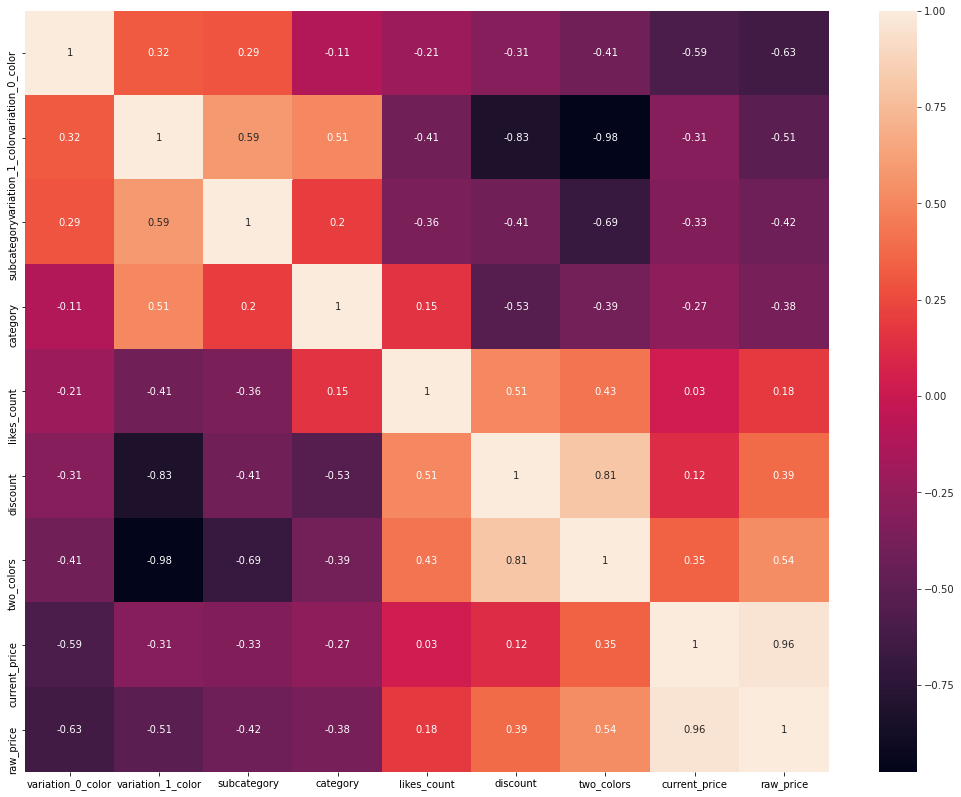

In [15]:
def correlation_map(data, method):
    
    
    corr = mean_colors_lable1.corr(method)
    ix = corr.sort_values('variation_0_color', ascending=False).index
    df_sorted_by_correlation = data.loc[:, ix]
    
    corr = df_sorted_by_correlation.corr(method)
    plt.subplots(figsize=(18,14))
    with sns.axes_style("white"):
        # display a correlation heatmap
        ax = sns.heatmap(corr, annot=True)
    plt.show()
correlation_map(mean_colors_lable1, method="pearson")


In [16]:
from matplotlib_venn import venn3, venn2

# one way ANOVA

In [17]:
colors = data1.groupby(data1.variation_0_color)
colors= colors[['current_price','raw_price','likes_count','discount', 'variation_0_color','variation_1_color']]


In [18]:
Black = colors.get_group(0)
Blue= colors.get_group(1)
Brown= colors.get_group(2)
Gray= colors.get_group(3)
Green= colors.get_group(4)
Orange= colors.get_group(5)
Pink= colors.get_group(6)
Purple= colors.get_group(7)
Red= colors.get_group(8)
White= colors.get_group(9)
Yellow= colors.get_group(10)
other= colors.get_group(11)

### One way anova variation_0_color

In [19]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('variation_0_color ~ current_price', data=data1).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
current_price,11126.281822,1.0,811.18611,7.215079e-177
Residual,623024.843461,45423.0,NaN,NaN


In [20]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('variation_0_color ~ likes_count', data=data1).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table



,sum_sq,df,F,PR(>F)
likes_count,42.374330,1.0,3.035393,0.081474
Residual,634108.750953,45423.0,NaN,NaN


In [21]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('variation_0_color ~ raw_price', data=data1).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
raw_price,8239.524807,1.0,597.95015,3.309026e-131
Residual,625911.600476,45423.0,NaN,NaN


In [22]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('variation_0_color ~ discount', data=data1).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
discount,35.996401,1.0,2.578498,0.108331
Residual,634115.128882,45423.0,NaN,NaN


### One way anova variation_1_color

In [23]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('variation_1_color ~ current_price', data=data1).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
current_price,676.749457,1.0,35.824613,2.175175e-09
Residual,858069.028991,45423.0,NaN,NaN


In [24]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('variation_1_color ~ raw_price', data=data1).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
raw_price,245.441570,1.0,12.986241,0.000314
Residual,858500.336878,45423.0,NaN,NaN


In [25]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('variation_1_color ~ discount', data=data1).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
discount,69.464447,1.0,3.67459,0.055254
Residual,858676.314001,45423.0,NaN,NaN


In [26]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('variation_1_color ~ likes_count', data=data1).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
likes_count,788.831928,1.0,41.763299,1.040595e-10
Residual,857956.946520,45423.0,NaN,NaN


### test the corrolation of the main color with the average of current price

# Regression Results

In [91]:
mean_colors_lable1.columns

Index(['variation_0_color', 'category', 'subcategory', 'current_price',
       'raw_price', 'discount', 'likes_count', 'variation_1_color',
       'two_colors'],
      dtype='object')

In [95]:
mean_colors_lable2 = mean_colors_lable1[['variation_0_color',  'current_price',
       'raw_price', 'discount', 'likes_count', 'variation_1_color']]

In [100]:
from statsmodels.formula.api import ols
x= mean_colors_lable1['current_price']
y= mean_colors_lable1['variation_0_color']
model = ols("y ~ x", mean_colors_lable1).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     5.280
Date:                Sat, 27 Nov 2021   Prob (F-statistic):             0.0444
Time:                        23:36:25   Log-Likelihood:                -29.351
No. Observations:                  12   AIC:                             62.70
Df Residuals:                      10   BIC:                             63.67
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.2131      8.624      2.924      0.0

In [ ]:
alt.data_transformers.enable('default', max_rows=None)

alt.Chart(fdata).mark_line().encode(
    x='variation_0_color:O',
    y='mean(current_price):Q',
)

### test the corrolation of the main color with the average of likes count


In [30]:
mean_colors_lable2 =data1.groupby(['variation_0_color'], as_index=False).sum()
mean_colors_lable2


,variation_0_color,category,subcategory,current_price,raw_price,discount,likes_count,variation_1_color,two_colors
0,0,30994,998408,376185.76,788740.36,612394,2281337,71012,10284
1,1,14507,477881,154242.17,329007.40,288463,1395202,35166,4004
2,2,8156,308265,112105.96,237268.43,176945,745633,16451,2828
3,3,6690,226518,77350.50,160786.99,133878,573754,12414,2198
4,4,7644,247114,74157.32,157919.78,143624,712007,15146,2255
5,5,1373,44804,13133.30,28375.39,25936,140324,3104,366
6,6,11296,409567,120376.72,263741.67,255921,1284485,22468,4098
7,7,2481,96147,26665.28,59443.75,57699,199346,4712,918
8,8,7348,281164,100766.88,215535.97,170065,748429,14292,2752
9,9,16344,557834,151338.24,311683.32,321787,1267888,31924,5338


In [31]:
from statsmodels.formula.api import ols
x= mean_colors_lable1['likes_count']
y= mean_colors_lable1['variation_0_color']
model = ols("y ~ x", mean_colors_lable1).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                 -0.054
Method:                 Least Squares   F-statistic:                    0.4410
Date:                Wed, 03 Nov 2021   Prob (F-statistic):              0.522
Time:                        11:24:28   Log-Likelihood:                -31.636
No. Observations:                  12   AIC:                             67.27
Df Residuals:                      10   BIC:                             68.24
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.0836      6.984      1.444      0.1

In [ ]:
alt.data_transformers.enable('default', max_rows=None)

alt.Chart(fdata).mark_line().encode(
    x='variation_0_color:O',
    y='mean(likes_count):Q',
)

In [29]:
from statsmodels.formula.api import ols
x= mean_colors_lable1['raw_price']
y= mean_colors_lable1['variation_0_color']
model = ols("y ~ x", mean_colors_lable1).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     6.586
Date:                Sat, 27 Nov 2021   Prob (F-statistic):             0.0281
Time:                        11:09:06   Log-Likelihood:                -28.859
No. Observations:                  12   AIC:                             61.72
Df Residuals:                      10   BIC:                             62.69
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.4963      7.838      3.253      0.0

In [30]:
from statsmodels.formula.api import ols
x= mean_colors_lable1['discount']
y= mean_colors_lable1['variation_0_color']
model = ols("y ~ x", mean_colors_lable1).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.070
Date:                Sat, 27 Nov 2021   Prob (F-statistic):              0.325
Time:                        11:10:07   Log-Likelihood:                -31.285
No. Observations:                  12   AIC:                             66.57
Df Residuals:                      10   BIC:                             67.54
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.1466     34.483      1.193      0.2

In [31]:
from statsmodels.formula.api import ols
x= mean_colors_lable1['discount']
y= mean_colors_lable1['variation_1_color']
model = ols("y ~ x", mean_colors_lable1).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     21.84
Date:                Sat, 27 Nov 2021   Prob (F-statistic):           0.000876
Time:                        11:10:56   Log-Likelihood:                -17.305
No. Observations:                  12   AIC:                             38.61
Df Residuals:                      10   BIC:                             39.58
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     55.6206     10.756      5.171      0.0

In [32]:
from statsmodels.formula.api import ols
x= mean_colors_lable1['current_price']
y= mean_colors_lable1['variation_1_color']
model = ols("y ~ x", mean_colors_lable1).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.045
Date:                Sat, 27 Nov 2021   Prob (F-statistic):              0.331
Time:                        11:11:52   Log-Likelihood:                -23.658
No. Observations:                  12   AIC:                             51.32
Df Residuals:                      10   BIC:                             52.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.8319      5.366      2.018      0.0

In [33]:
from statsmodels.formula.api import ols
x= mean_colors_lable1['raw_price']
y= mean_colors_lable1['variation_1_color']
model = ols("y ~ x", mean_colors_lable1).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     3.434
Date:                Sat, 27 Nov 2021   Prob (F-statistic):             0.0936
Time:                        11:12:35   Log-Likelihood:                -22.483
No. Observations:                  12   AIC:                             48.97
Df Residuals:                      10   BIC:                             49.94
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.8619      4.607      3.009      0.0

In [44]:
from statsmodels.formula.api import ols
x= mean_colors_lable1['likes_count']
y= mean_colors_lable1['variation_1_color']
model = ols("y ~ x", mean_colors_lable1).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     2.011
Date:                Sat, 27 Nov 2021   Prob (F-statistic):              0.187
Time:                        11:25:04   Log-Likelihood:                -23.155
No. Observations:                  12   AIC:                             50.31
Df Residuals:                      10   BIC:                             51.28
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.2022      3.445      2.961      0.0

# Chi-Square

In [53]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [79]:
contigency= pd.crosstab(fdata['category'], fdata['variation_0_color'])
contigency

variation_0_color,Black,Blue,Brown,Gray,Green,Orange,Pink,Purple,Red,White,Yellow,other
category,,,,,,,,,,,,
bags,1555,595,635,248,273,41,664,260,821,328,288,38
kids,425,481,215,268,148,43,947,105,163,633,276,110
men,2075,1313,630,706,654,105,550,105,442,2217,476,340
shoes,4633,1056,807,482,504,96,963,186,947,1143,807,71
women,3130,2058,1065,891,1169,208,1590,402,865,1962,818,399


In [61]:
contigency_pct = pd.crosstab(fdata['category'], fdata['variation_0_color'], normalize='index')
contigency_pct

variation_0_color,Black,Blue,Brown,Gray,Green,Orange,Pink,Purple,Red,White,Yellow,other
category,,,,,,,,,,,,
bags,0.270623,0.103550,0.110512,0.043160,0.047511,0.007135,0.115559,0.045249,0.142882,0.057083,0.050122,0.006613
kids,0.111432,0.126114,0.056371,0.070267,0.038804,0.011274,0.248296,0.027530,0.042737,0.165967,0.072365,0.028841
men,0.215854,0.136586,0.065536,0.073442,0.068033,0.010923,0.057214,0.010923,0.045979,0.230625,0.049516,0.035369
shoes,0.396152,0.090295,0.069004,0.041214,0.043095,0.008209,0.082343,0.015904,0.080975,0.097734,0.069004,0.006071
women,0.215017,0.141375,0.073161,0.061208,0.080305,0.014289,0.109226,0.027616,0.059422,0.134781,0.056193,0.027409


In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(contigency_pct, annot=True, cmap="YlGnBu")

In [37]:
G1 = mean_colors_lable1['variation_0_color']
G2 = mean_colors_lable1['current_price']
stats.chisquare(G1, G2)


Power_divergenceResult(statistic=222.95358163016857, pvalue=1.2515423949015698e-41)

In [38]:
G1 = mean_colors_lable1['variation_0_color']
G2 = mean_colors_lable1['likes_count']
stats.chisquare(G1, G2)

Power_divergenceResult(statistic=2619.180846695888, pvalue=0.0)

In [39]:
G1 = mean_colors_lable1['variation_0_color']
G2 = mean_colors_lable1['raw_price']
stats.chisquare(G1, G2)

Power_divergenceResult(statistic=587.8100941280893, pvalue=5.667774466868258e-119)

In [40]:
G1 = mean_colors_lable1['variation_0_color']
G2 = mean_colors_lable1['discount']
stats.chisquare(G1, G2)

Power_divergenceResult(statistic=504.24785343349635, pvalue=3.9825957848225824e-101)

In [42]:
G1 = mean_colors_lable1['two_colors']
G2 = mean_colors_lable1['current_price']
stats.chisquare(G1, G2)

Power_divergenceResult(statistic=317.5369251796712, pvalue=1.75679528941357e-61)

In [19]:
data2, encoders1 = label_encode_fit(data1,data1.columns)
data1 = data1[['category', 'subcategory', 'current_price', 'raw_price','discount', 'likes_count','variation_0_color', 'variation_1_color', 'two_colors']]


In [35]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(mean_colors_lable1['variation_0_color'], mean_colors_lable1['likes_count'], mean_colors_lable1['variation_1_color'], mean_colors_lable1['current_price'])
print(fvalue, pvalue)


# 404.24278368078905 4.968323675185702e-32

404.24278368078905 4.968323675185702e-32


In [36]:
# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('variation_0_color ~ current_price', data=mean_colors_lable1).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
current_price,49.415073,1.0,5.280239,0.044414
Residual,93.584927,10.0,NaN,NaN


In [37]:
# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('two_colors ~ likes_count', data=mean_colors_lable1).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
likes_count,0.090389,1.0,2.216138,0.167417
Residual,0.407867,10.0,NaN,NaN


In [38]:
# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('two_colors ~ current_price', data=mean_colors_lable1).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
current_price,0.059817,1.0,1.364323,0.269883
Residual,0.438438,10.0,NaN,NaN


In [39]:
mean_colors_lable1.describe()

,variation_0_color,category,subcategory,current_price,raw_price,discount,likes_count,variation_1_color,two_colors
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,5.500000,2.563206,88.742041,27.981696,59.206130,52.200379,229.064568,5.837447,0.771511
std,3.605551,0.167814,3.260618,3.008512,6.730272,1.641251,37.031049,2.059847,0.212828
min,0.000000,2.269302,84.481977,24.086939,47.927401,48.001044,165.160752,4.413836,0.112735
25%,2.750000,2.423947,86.838219,25.452872,56.125913,51.761751,199.607240,4.779418,0.801046
50%,5.500000,2.599152,88.037415,27.507333,58.671744,52.385035,226.791748,5.249137,0.848304
75%,8.250000,2.655385,90.877217,30.135661,63.111363,52.653361,256.719859,6.080637,0.859977
max,11.000000,2.784990,95.618998,33.444499,70.784138,54.535917,284.632860,12.018789,0.870198


# Confidence intervals

In [41]:
import pandas as pd
import numpy as np
import math
from scipy import stats

likes_ic = fdata.groupby(['variation_0_color'])['likes_count'].agg(['mean', 'count', 'std'])


ci95_hi = []
ci95_lo = []

for i in likes_ic.index:
    m, c, s = likes_ic.loc[i]
    ci95_hi.append(m + 1.96*s/math.sqrt(c))
    ci95_lo.append(m - 1.96*s/math.sqrt(c))

likes_ic['ci95_hi'] = ci95_hi
likes_ic['ci95_lo'] = ci95_lo
likes_ic

,mean,count,std,ci95_hi,ci95_lo
variation_0_color,,,,,
Black,193.039178,11818,544.643724,202.858841,183.219515
Blue,253.534799,5503,744.538519,273.206571,233.863027
Brown,222.444212,3352,596.870389,242.650387,202.238038
Gray,221.099807,2595,523.659825,241.248026,200.951589
Green,259.100073,2748,769.559071,287.873372,230.326773
Orange,284.632860,493,851.176855,359.769612,209.496108
Pink,272.483029,4714,774.488496,294.592393,250.373665
Purple,188.417769,1058,491.025956,218.005911,158.829628
Red,231.139284,3238,653.603233,253.652204,208.626363


In [42]:
import pandas as pd
import numpy as np
import math
from scipy import stats

current_price_ic = fdata.groupby(['variation_0_color'])['current_price'].agg(['mean', 'count', 'std'])


ci95_hi = []
ci95_lo = []

for i in current_price_ic.index:
    m, c, s = current_price_ic.loc[i]
    ci95_hi.append(m + 1.96*s/math.sqrt(c))
    ci95_lo.append(m - 1.96*s/math.sqrt(c))

current_price_ic['ci95_hi'] = ci95_hi
current_price_ic['ci95_lo'] = ci95_lo
current_price_ic

,mean,count,std,ci95_hi,ci95_lo
variation_0_color,,,,,
Black,31.831592,11818,17.037474,32.138770,31.524415
Blue,28.028743,5503,14.877585,28.421830,27.635655
Brown,33.444499,3352,19.208148,34.094763,32.794235
Gray,29.807514,2595,17.772862,30.491339,29.123690
Green,26.985924,2748,13.752442,27.500119,26.471730
Orange,26.639554,493,13.616722,27.841556,25.437552
Pink,25.536003,4714,14.536262,25.950971,25.121036
Purple,25.203478,1058,14.802377,26.095437,24.311520
Red,31.120099,3238,17.220002,31.713230,30.526968


In [43]:
import pandas as pd
import numpy as np
import math
from scipy import stats

raw_price_ic = fdata.groupby(['variation_0_color'])['raw_price'].agg(['mean', 'count', 'std'])


ci95_hi = []
ci95_lo = []

for i in raw_price_ic.index:
    m, c, s = raw_price_ic.loc[i]
    ci95_hi.append(m + 1.96*s/math.sqrt(c))
    ci95_lo.append(m - 1.96*s/math.sqrt(c))

raw_price_ic['ci95_hi'] = ci95_hi
raw_price_ic['ci95_lo'] = ci95_lo
raw_price_ic

,mean,count,std,ci95_hi,ci95_lo
variation_0_color,,,,,
Black,66.740596,11818,56.918569,67.766810,65.714381
Blue,59.786916,5503,31.733194,60.625353,58.948480
Brown,70.784138,3352,37.608976,72.057335,69.510941
Gray,61.960304,2595,34.329375,63.281154,60.639455
Green,57.467169,2748,28.944960,58.549402,56.384936
Orange,57.556572,493,30.886610,60.283055,54.830089
Pink,55.948594,4714,29.180204,56.781602,55.115585
Purple,56.185019,1058,34.240018,58.248247,54.121791
Red,66.564537,3238,36.125912,67.808869,65.320204


In [44]:

import pandas as pd
import numpy as np
import math
from scipy import stats

discount_ic = fdata.groupby(['variation_0_color'])['discount'].agg(['mean', 'count', 'std'])


ci95_hi = []
ci95_lo = []

for i in discount_ic.index:
    m, c, s = discount_ic.loc[i]
    ci95_hi.append(m + 1.96*s/math.sqrt(c))
    ci95_lo.append(m - 1.96*s/math.sqrt(c))

discount_ic['ci95_hi'] = ci95_hi
discount_ic['ci95_lo'] = ci95_lo
discount_ic

,mean,count,std,ci95_hi,ci95_lo
variation_0_color,,,,,
Black,51.818751,11818,10.306383,52.004570,51.632932
Blue,52.419226,5503,10.142316,52.687200,52.151251
Brown,52.787888,3352,10.537228,53.144610,52.431165
Gray,51.590751,2595,10.966258,52.012687,51.168816
Green,52.264920,2748,9.606285,52.624093,51.905747
Orange,52.608519,493,9.678306,53.462862,51.754177
Pink,54.289563,4714,10.523268,54.589971,53.989155
Purple,54.535917,1058,10.293752,55.156196,53.915638
Red,52.521618,3238,10.197615,52.872868,52.170368


In [46]:

import pandas as pd
import numpy as np
import math
from scipy import stats

likes_count_ic = fdata.groupby(['variation_0_color'])['likes_count'].agg(['mean', 'count', 'std'])


ci95_hi = []
ci95_lo = []

for i in likes_count_ic.index:
    m, c, s = likes_count_ic.loc[i]
    ci95_hi.append(m + 1.96*s/math.sqrt(c))
    ci95_lo.append(m - 1.96*s/math.sqrt(c))

likes_count_ic['ci95_hi'] = ci95_hi
likes_count_ic['ci95_lo'] = ci95_lo
likes_count_ic

,mean,count,std,ci95_hi,ci95_lo
variation_0_color,,,,,
Black,193.039178,11818,544.643724,202.858841,183.219515
Blue,253.534799,5503,744.538519,273.206571,233.863027
Brown,222.444212,3352,596.870389,242.650387,202.238038
Gray,221.099807,2595,523.659825,241.248026,200.951589
Green,259.100073,2748,769.559071,287.873372,230.326773
Orange,284.632860,493,851.176855,359.769612,209.496108
Pink,272.483029,4714,774.488496,294.592393,250.373665
Purple,188.417769,1058,491.025956,218.005911,158.829628
Red,231.139284,3238,653.603233,253.652204,208.626363


# Export Data

In [4]:
fdata.to_csv('/Volumes/LOVUN/George Mason Files/Fall 2021/AIT 664/Project /data/fdata.csv', index=False)
data1.to_csv("/Volumes/LOVUN/George Mason Files/Fall 2021/AIT 664/Project /data/data1.csv")


In [82]:
#Test whether a sample differs from a normal distribution

k2, p = stats.normaltest(mean_colors_lable1['variation_0_color'])
alpha = 1e-3
print("p = {:g}".format(p))

if p < alpha:  # null hypothesis: raw_price_USD comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
     print("The null hypothesis cannot be rejected")
     
#stats.normaltest(data1['variation_0_color'])
# The null hypothesis can be rejected (There is a different between the samples)

p = 0.305042
The null hypothesis cannot be rejected


In [83]:
#Test whether a sample differs from a normal distribution

k2, p = stats.normaltest(mean_colors_lable1['variation_1_color'])
alpha = 1e-3
print("p = {:g}".format(p))

if p < alpha:  # null hypothesis: raw_price_USD comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
     print("The null hypothesis cannot be rejected")
     
#stats.normaltest(data1['variation_0_color'])
# The null hypothesis can be rejected (There is a different between the samples)

p = 2.14027e-06
The null hypothesis can be rejected


In [85]:
#Test whether a sample differs from a normal distribution

k2, p = stats.normaltest(data1['current_price'])
alpha = 1e-3
print("p = {:g}".format(p))

if p < alpha:  # null hypothesis: raw_price_USD comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
     print("The null hypothesis cannot be rejected")
     
#stats.normaltest(data1['variation_0_color'])
# The null hypothesis can be rejected (There is a different between the samples)

p = 0
The null hypothesis can be rejected


In [22]:
fdata['variation_0_color'].unique()

array(['White', 'Brown', 'Green', 'Red', 'Black', 'Blue', 'Gray',
       'Yellow', 'Orange', 'Pink', 'other', 'Purple'], dtype=object)

In [23]:
data1['variation_0_color'].unique()

array([ 9,  2,  4,  8,  0,  1,  3, 10,  5,  6, 11,  7])